<ol>
<li> <strong>Input a set of training examples</strong></p><p><li> <strong>For each training example $x$:</strong> Set the corresponding
  input activation $a^{x,1}$, and perform the following steps:</p><p><ul>
<li> <strong>Feedforward:</strong> For each $l = 2, 3, \ldots, L$ compute
  $z^{x,l} = w^l a^{x,l-1}+b^l$ and $a^{x,l} = \sigma(z^{x,l})$.</p><p><li> <strong>Output error $\delta^{x,L}$:</strong> Compute the vector
  $\delta^{x,L} = \nabla_a C_x \odot \sigma'(z^{x,L})$.</p><p><li> <strong>Backpropagate the error:</strong> For each $l = L-1, L-2,
  \ldots, 2$ compute $\delta^{x,l} = ((w^{l+1})^T \delta^{x,l+1})
  \odot \sigma'(z^{x,l})$.
</ul></p><p><li> <strong>Gradient descent:</strong> For each $l = L, L-1, \ldots, 2$
  update the weights according to the rule $w^l \rightarrow
  w^l-\frac{\eta}{m} \sum_x \delta^{x,l} (a^{x,l-1})^T$, and the
  biases according to the rule $b^l \rightarrow b^l-\frac{\eta}{m}
  \sum_x \delta^{x,l}$.</p><p></ol>

$$\eqalign{
  & Loss function =  - y\ln \hat y - \left( {1 - y} \right)\ln \left( {1 - \hat y} \right)  \cr 
  & C = \frac{{\partial L}}{{\partial \hat y}} = \left( {\frac{{1 - y}}{{1 - \hat y}} - \frac{y}{{\hat y}}} \right) \cr} $$

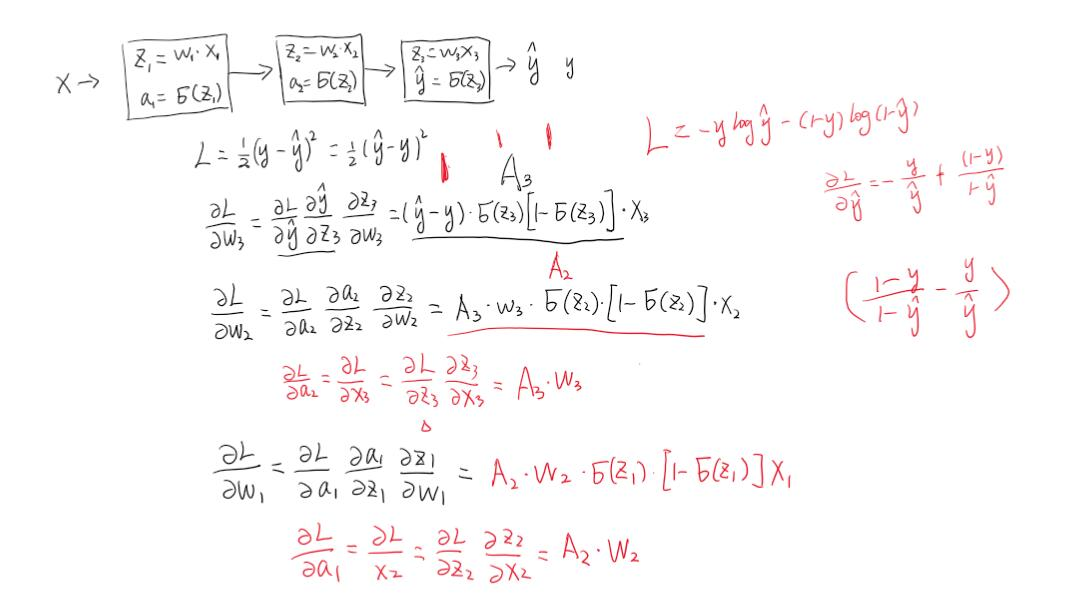

In [1]:
import numpy as np

class NeuralLayer:
    
    
    def __init__(self,input_dim,num_units,name):
        self.name = name
        self.W = np.random.randn(num_units,input_dim)
        
    
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))
    
    
    def forward(self,X):
        self.X = X
        self.sig_Z = self.sigmoid(self.W.dot(X))
        return self.sig_Z
    
    
    def backward(self,C):#C means costs
        self.delta = C*self.sig_Z*(1-self.sig_Z)
        self.deltaW = self.delta.dot(self.X.T)
    
    
    def update(self):
        self.W = self.W - 0.5*self.deltaW
    
    
class NeuralNetwork:
    def __init__(self):
        self.input_layer = NeuralLayer(3,4,"input")
        self.hidden_layer = NeuralLayer(4,4,"hidden")
        self.output_layer = NeuralLayer(4,1,"output")
    
    
    def forward(self,X):
        X_h = self.input_layer.forward(X)
        X_o = self.hidden_layer.forward(X_h)
        self.Y_hat = self.output_layer.forward(X_o)
        
    
    
    def backward(self,C):
        self.output_layer.backward(C)
        self.hidden_layer.backward(self.output_layer.W.T.dot(self.output_layer.delta))
        self.input_layer.backward(self.hidden_layer.W.T.dot(self.hidden_layer.delta))
    
    
    def update(self):
        self.input_layer.update()
        self.hidden_layer.update()
        self.output_layer.update()
        
        
    def train(self,X,Y):
        self.forward(X)
        C = (1-Y)/(1-self.Y_hat)-Y/self.Y_hat
        self.backward(C)
        self.update()
        
        
    def predict(self,X):
        self.forward(X)
        print(self.Y_hat)

In [2]:
nn = NeuralNetwork()

In [3]:
X1 = np.array([[1],[1],[1]])
X2 = np.array([[0],[0],[1]])
X3 = np.array([[0],[1],[1]])
X4 = np.array([[1],[0],[1]])

X_Batch = np.array([[1,0,0,1],[1,0,1,0],[1,1,1,1]])
Y_batch = np.array([[0,0,1,1]])

## BGD

In [4]:
for i in range(50000):
    nn.train(X_Batch,Y_batch)

In [5]:
nn.predict(X_Batch)

[[1.14227284e-05 1.30373842e-05 9.99989185e-01 9.99985584e-01]]


## SGD

In [6]:
for i in range(50000):
    nn.train(X1,0)
    nn.train(X2,0)
    nn.train(X3,1)
    nn.train(X4,1)
nn.predict(X1)
nn.predict(X2)
nn.predict(X3)
nn.predict(X4)

[[5.56734292e-06]]
[[6.30477393e-06]]
[[0.99999474]]
[[0.99999298]]
